In [43]:
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [20]:
url = "https://www.mise.gov.it/images/exportCSV/prezzo_alle_8.csv"
df_prezzi = pd.read_csv(url, delimiter=';', skiprows=1)
df_prezzi.head(2)

idImpianto descCarburante  prezzo  isSelf               dtComu
0        6492    Hi-Q Diesel   1.644       1  11/10/2021 17:33:16
1        6612    Hi-Q Diesel   1.669       1  13/10/2021 01:11:44

In [38]:
url_impianti = "https://www.mise.gov.it/images/exportCSV/anagrafica_impianti_attivi.csv"
df_impianti = pd.read_csv(url_impianti, delimiter=';', skiprows=1)

In [39]:
geo_stations = gpd.GeoDataFrame(
    df_impianti,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(df_impianti.Longitudine, df_impianti.Latitudine))

In [40]:
# Keeping only usefull columns
geo_stations = geo_stations.loc[:, ['idImpianto', 'Gestore','Bandiera', 'Nome Impianto','Indirizzo', 'Comune', 'geometry']]

## Retriving only valid geometry
geo_stations= geo_stations.loc[geo_stations.geometry.is_valid,:]

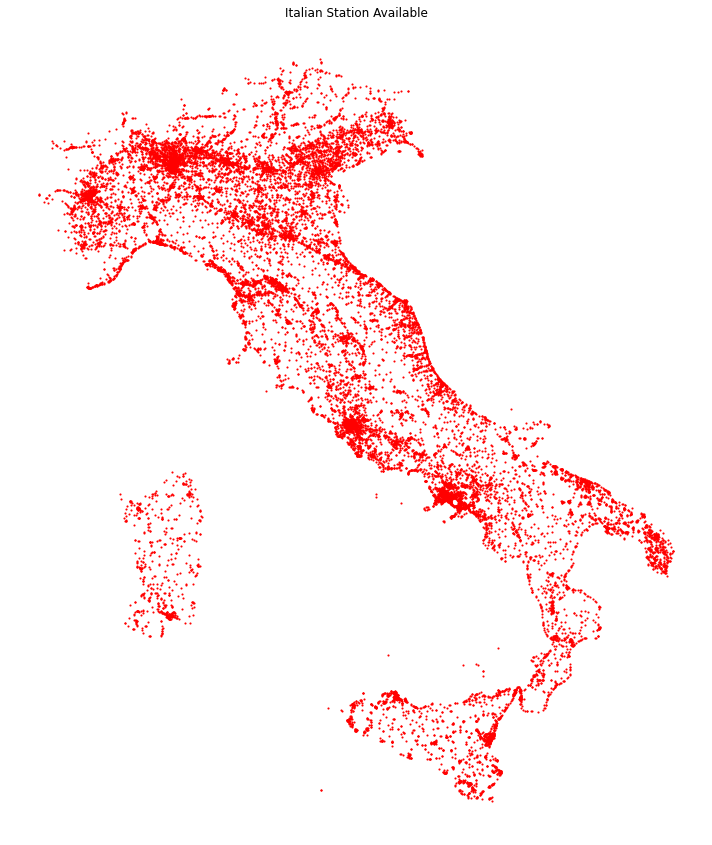

In [52]:
fix, axes= plt.subplots(1,1, figsize=(15,15))

plt.title('Italian Station Available')

geo_stations.plot(ax=axes,
                    color='red',
                    markersize= 1.2
                    )

plt.axis('off')
plt.show()